#Problem Statement

Deskripsi Tugas:

*   Buatlah model menggunakan pendekatan Machine Learning (algoritma nya bebas, minimal 1 algoritma) dan pendekatan Deep Learning (dengan ANN, arsitektur layer-nya bebas) yang dapat memprediksi nilai premi asuransi (variabel “charges” pada dataset) dari fitur-fitur yang diberikan.
*   Gunakan metric regression (MAE, RMSE, atau MSE) untuk evaluasi performa model. Kemudian buat kesimpulan dengan membandingkan performa model yang dibangun dengan pendekatan ML vs DL.

#About Dataset

Deskripsi Dataset :
*  Age : Age of the insured
*  Sex : Gender
*  Bmi : body mass index
*  Children : Number of children
*  Smoker : Indicator if you smoke
*  Region : Region where the insured lives
*  Charges : Secure prime


#Machine Learning

##Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load csv file using pandas
data = pd.read_csv("/content/drive/MyDrive/Celerates/insurance.csv")

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
data.shape

(1338, 7)

In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

tidak ada missing value

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [ ]:
data.duplicated().value_counts()

False    1337
True        1
Name: count, dtype: int64

In [ ]:
# droping duplicate values
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(1337, 7)

##EDA

In [ ]:
data.describe().T.head(4)

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


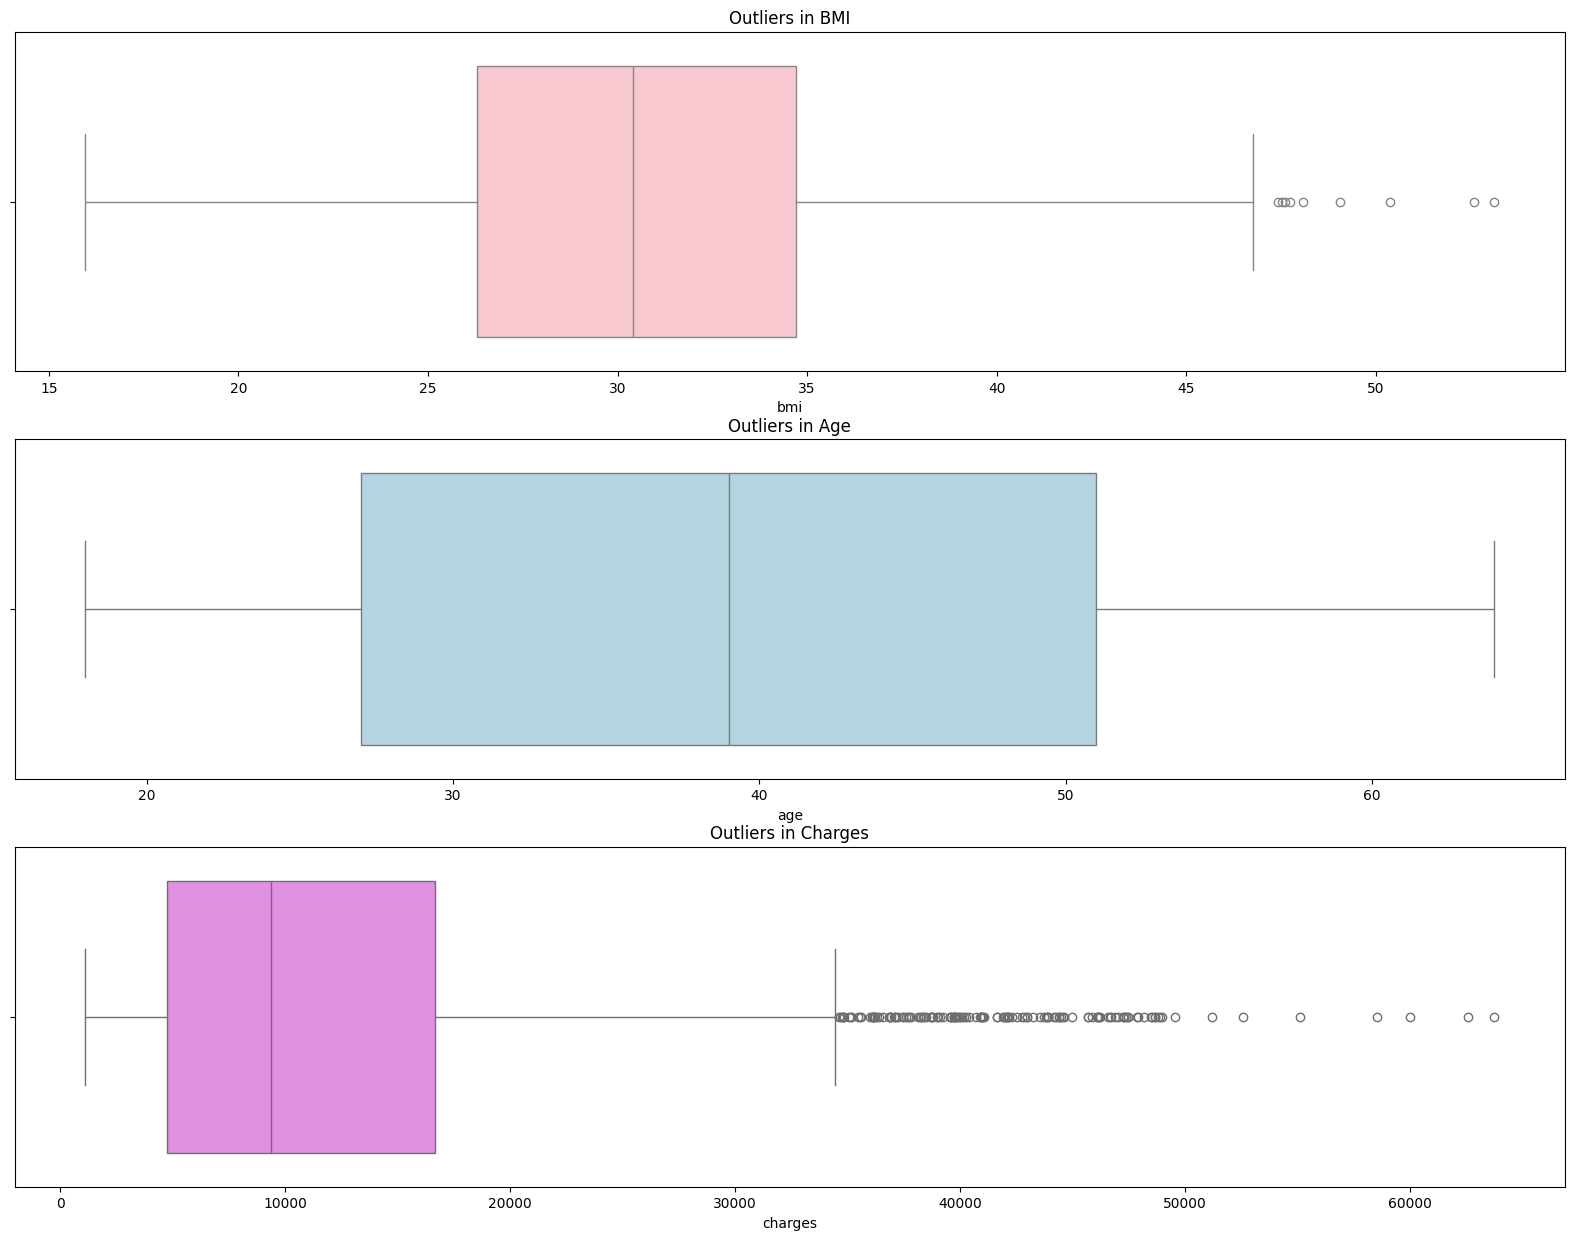

In [ ]:
#Checking for the Outliers

plt.figure(figsize=(20, 15))
plt.subplot(3, 1, 1)
sns.boxplot(x = data.bmi, color='pink').set_title('Outliers in BMI')
plt.subplot(3, 1, 2)
sns.boxplot(x = data.age, color='lightblue').set_title('Outliers in Age')
plt.subplot(3, 1, 3)
sns.boxplot(x = data.charges, color='violet').set_title('Outliers in Charges')
plt.show()

BMI memiliki beberapa outliers.

Charges memiliki banyak outliers.

In [ ]:
# Handling outliers
# Remove outliers based on a specific threshold
data_cleaned = data[(data['charges'] < 21000) & (data['bmi'] < 46)]

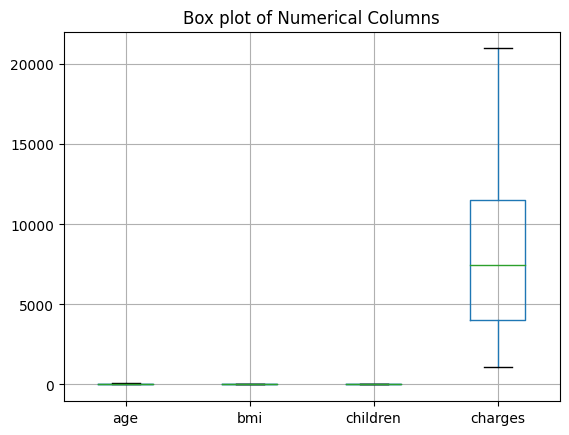

In [ ]:
# visualize boxplot after removing outliers
data_cleaned.boxplot(column=['age', 'bmi', 'children', 'charges'])
plt.title('Box plot of Numerical Columns')
plt.show()

In [ ]:
# Get summary statistics
data_cleaned.describe()

,age,bmi,children,charges
count,1068.000000,1068.000000,1068.000000,1068.000000
mean,38.371723,30.091910,1.076779,8159.150438
std,13.943164,5.856569,1.221375,4929.643963
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.840000,0.000000,4038.478863
50%,38.000000,29.830000,1.000000,7441.277000
75%,50.000000,33.933750,2.000000,11539.380487
max,64.000000,45.900000,5.000000,20984.093600


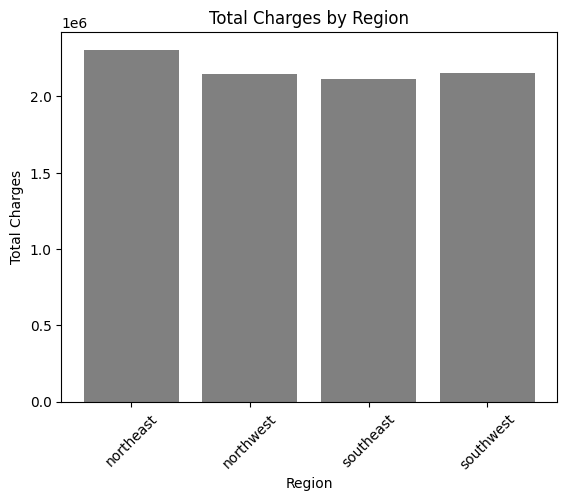

In [ ]:
# Calculate the total charges by region
charges_by_region = data_cleaned.groupby('region')['charges'].sum()

# Create a bar chart
plt.bar(charges_by_region.index, charges_by_region.values, color='grey')

# Add labels and title
plt.xlabel('Region')

plt.ylabel('Total Charges')
plt.title('Total Charges by Region')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the chart
plt.show()

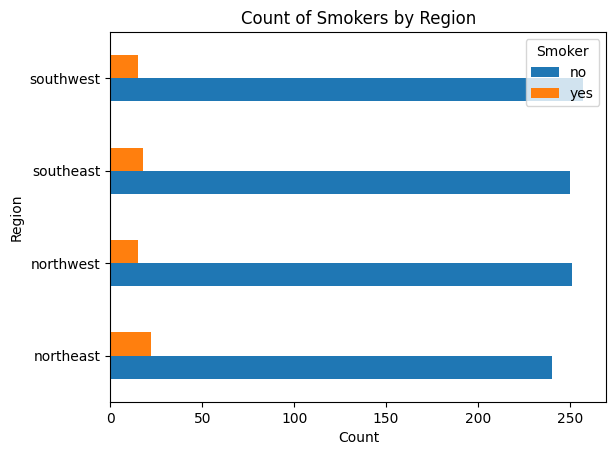

In [ ]:
smokers_by_region = data_cleaned.groupby('region')['smoker'].value_counts().unstack().fillna(0)
smokers_by_region.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Region')
plt.title('Count of Smokers by Region')
plt.legend(title='Smoker', loc='upper right')
plt.show()

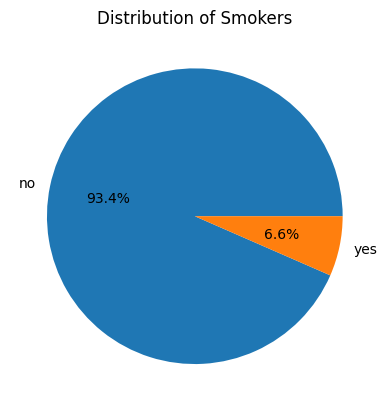

In [ ]:
smoker_counts = data_cleaned['smoker'].value_counts()
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Smokers')
plt.show()

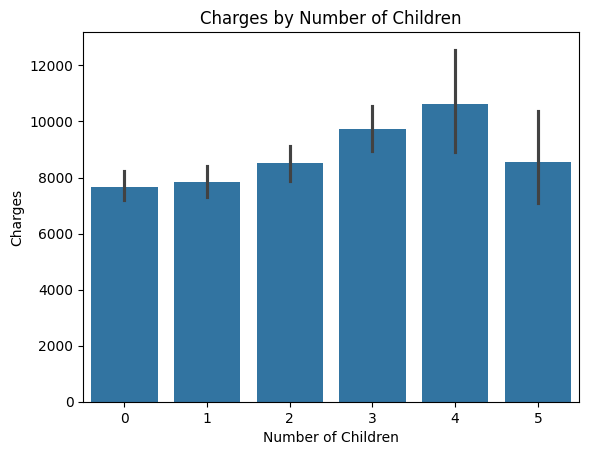

In [ ]:
sns.barplot(x=data_cleaned['children'], y=data_cleaned['charges'])

plt.xlabel('Number of Children')
plt.ylabel('Charges')

plt.title('Charges by Number of Children')
plt.show()


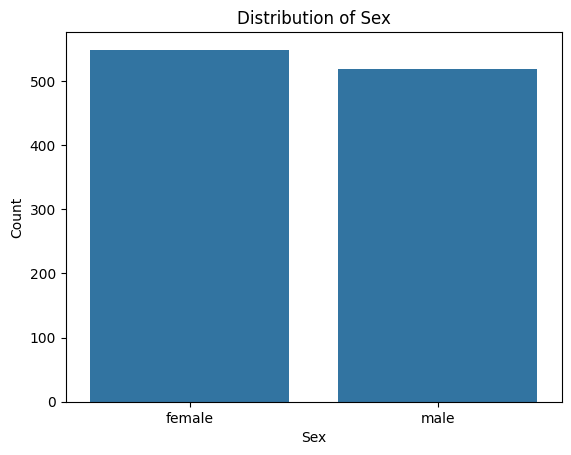

In [ ]:
sns.countplot(x='sex', data=data_cleaned)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

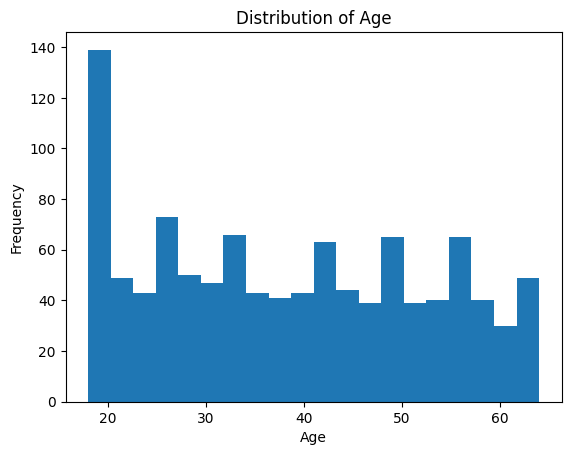

In [ ]:
# distribution of age using histogram
data_cleaned['age'].plot(kind='hist', bins=20)

plt.xlabel('Age')
plt.title('Distribution of Age')

plt.show()

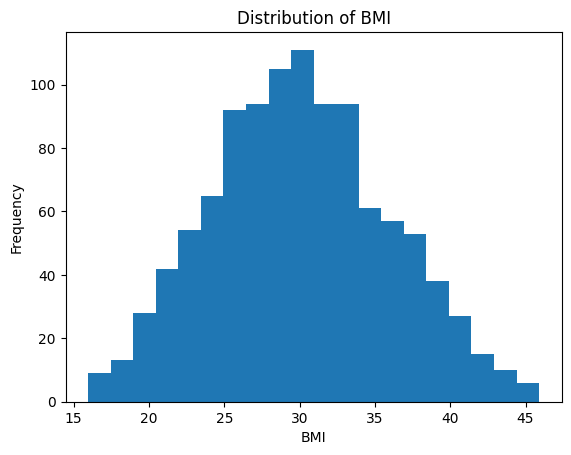

In [ ]:
# distribution of BMI using histogram
data_cleaned['bmi'].plot(kind='hist', bins=20)
plt.xlabel('BMI')
plt.title('Distribution of BMI')
plt.show()

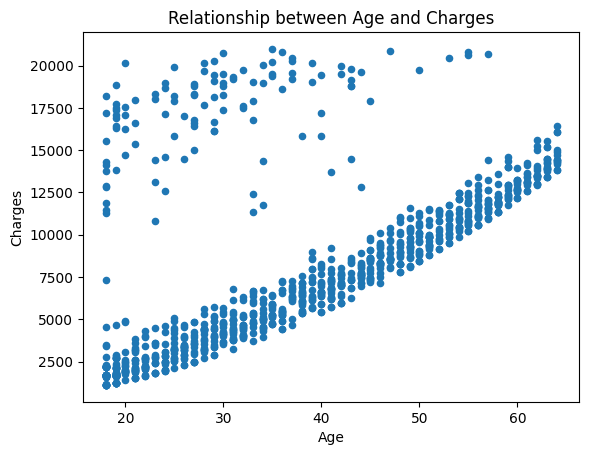

In [ ]:
# relationship between age and charges using scatterplot
data_cleaned.plot(kind='scatter', x='age', y='charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Relationship between Age and Charges')
plt.show()

Ada hubungan yang meningkat secara linear antara usia dan biaya asuransi. Orang yang lebih tua cenderung dikenai biaya lebih tinggi.

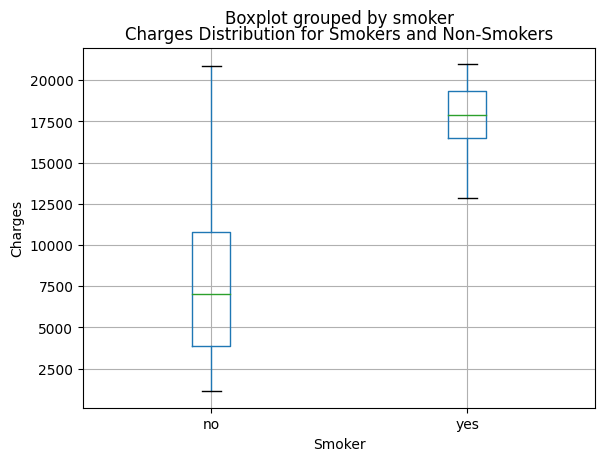

In [ ]:
# charges distribution for smokers vs non-smokers using boxplot
data_cleaned.boxplot(column='charges', by='smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges Distribution for Smokers and Non-Smokers')
plt.show()

Perokok memiliki Charges yang lebih tinggi

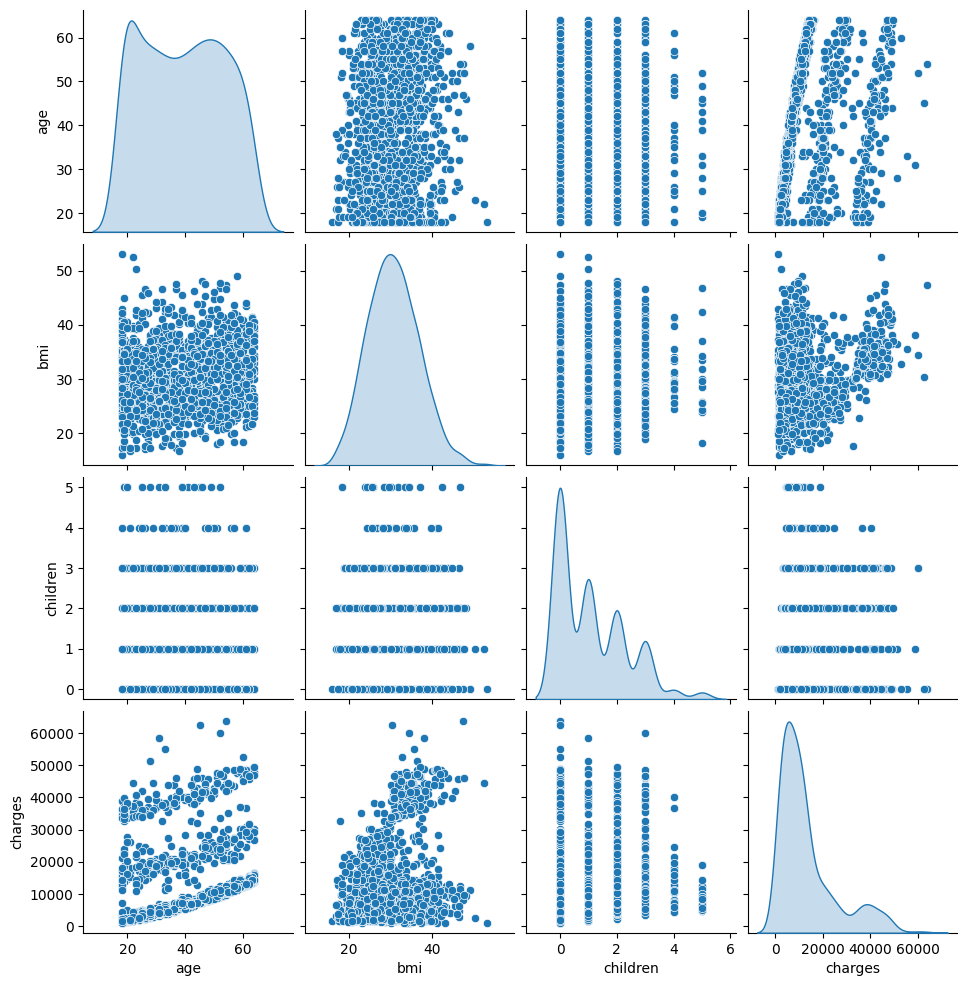

In [ ]:
sns.pairplot(data,diag_kind='kde')

Polanya antara 'usia' dan 'biaya' menunjukkan bahwa orang yang lebih tua dikenakan biaya lebih tinggi daripada yang lebih muda.

Dibandingkan perokok dan bukan perokok, perokok mengklaim lebih banyak uang daripada bukan perokok.

##Data Preparation

One Hot Encoder

In [ ]:
data_cleaned['age_group'] = pd.cut(data_cleaned['age'], bins=[0, 25, 40, 60, data_cleaned['age'].max()], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])
data_cleaned.sample(5)

<ipython-input-34-9d10286b0985>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['age_group'] = pd.cut(data_cleaned['age'], bins=[0, 25, 40, 60, data_cleaned['age'].max()], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])


,age,sex,bmi,children,smoker,region,charges,age_group
933,45,female,35.300,0,no,southwest,7348.14200,Middle-aged
1327,51,male,30.030,1,no,southeast,9377.90470,Middle-aged
266,40,male,19.800,1,yes,southeast,17179.52200,Adult
981,34,male,21.375,0,no,northeast,4500.33925,Adult
550,63,male,30.800,0,no,southwest,13390.55900,Senior


In [ ]:
data_encoded = pd.get_dummies(data_cleaned, columns=['region'], prefix='region', dtype=int)
data_encoded.sample(5)

,age,sex,bmi,children,smoker,charges,age_group,region_northeast,region_northwest,region_southeast,region_southwest
805,45,female,35.815,0,no,7731.85785,Middle-aged,0,1,0,0
894,62,male,32.110,0,no,13555.00490,Senior,1,0,0,0
133,19,male,25.555,0,no,1632.56445,Young,0,1,0,0
41,31,female,36.630,2,no,4949.75870,Adult,0,0,1,0
18,56,male,40.300,0,no,10602.38500,Middle-aged,0,0,0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
data_encoded['smoker_encoded'] = label_encoder.fit_transform(data_encoded['smoker'])
data_encoded.sample(5)

,age,sex,bmi,children,smoker,charges,age_group,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded
181,18,female,38.280,0,no,1631.82120,Young,0,0,1,0,0
473,47,female,33.345,0,no,20878.78443,Middle-aged,1,0,0,0,0
707,49,male,28.690,3,no,10264.44210,Middle-aged,0,1,0,0,0
325,40,male,34.105,1,no,6600.20595,Adult,1,0,0,0,0
1161,34,male,42.130,2,no,5124.18870,Adult,0,0,1,0,0


In [ ]:
data_encoded = data_encoded[[x for x in data_encoded.columns if x not in ['smoker', 'sex']]]
data_encoded.sample(5)

,age,bmi,children,charges,age_group,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded
946,42,35.80,2,7160.0940,Middle-aged,0,0,0,1,0
7,37,27.74,3,7281.5056,Adult,0,1,0,0,0
567,41,30.59,2,7256.7231,Middle-aged,0,1,0,0,0
112,37,30.80,0,4646.7590,Adult,0,0,0,1,0
61,25,33.66,4,4504.6624,Young,0,0,1,0,0


##Correlation Analysis

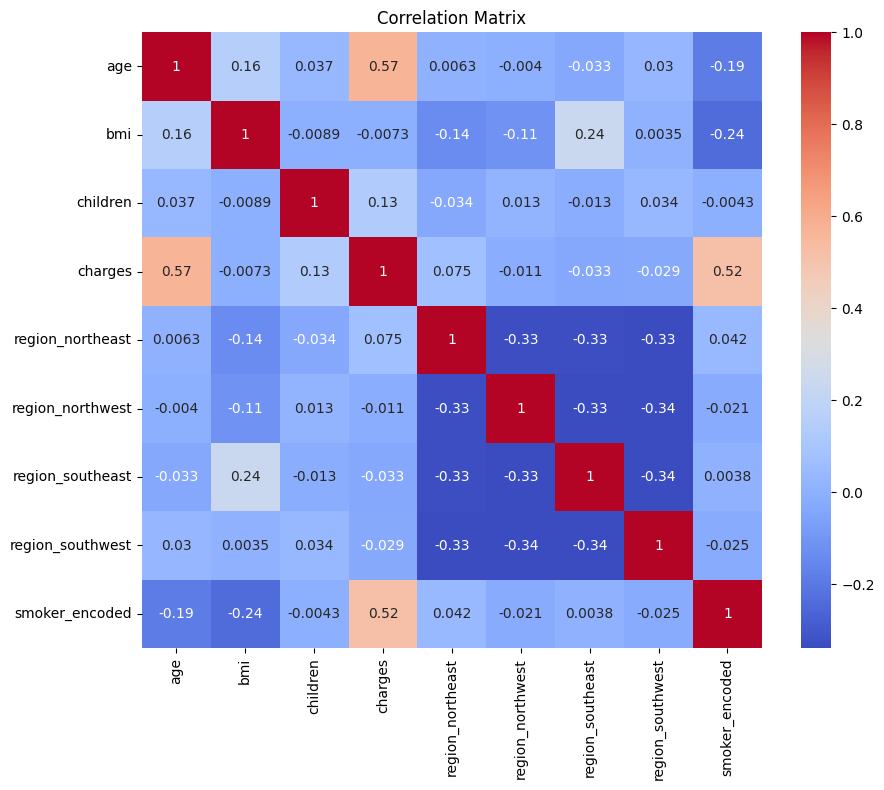

Relevant features based on correlation:
['age', 'smoker_encoded']


In [ ]:
numr_cols = [x for x in data_encoded.columns if x not in ['age_group']]
corr_matrix = data_encoded[numr_cols].corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Identify relevant features based on correlation
threshold = 0.3
relevant_features = corr_matrix[(corr_matrix['charges'].abs() > threshold) & (corr_matrix.index != 'charges')].index.tolist()
print("Relevant features based on correlation:")
print(relevant_features)

##Modelling

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Select the relevant features
X = data_encoded[['age', 'smoker_encoded']]
y = data_encoded['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

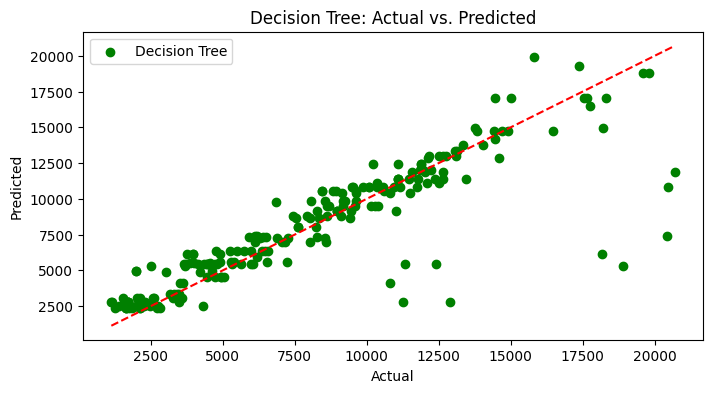

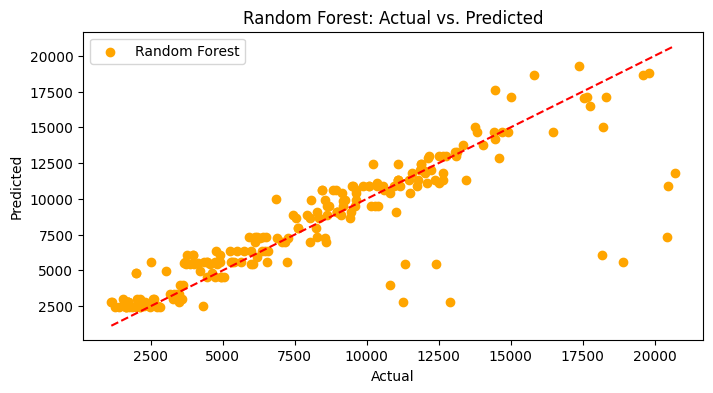

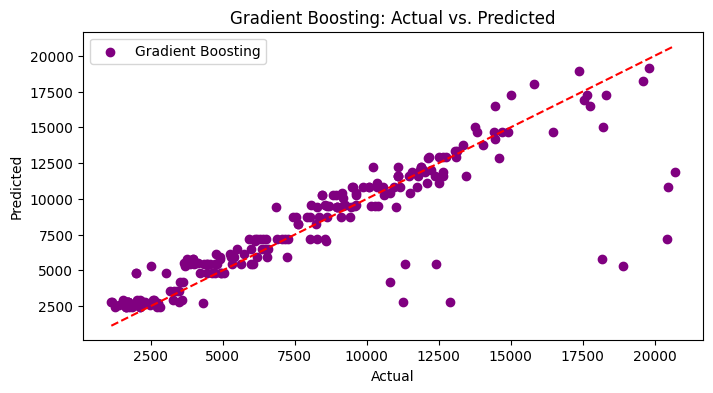

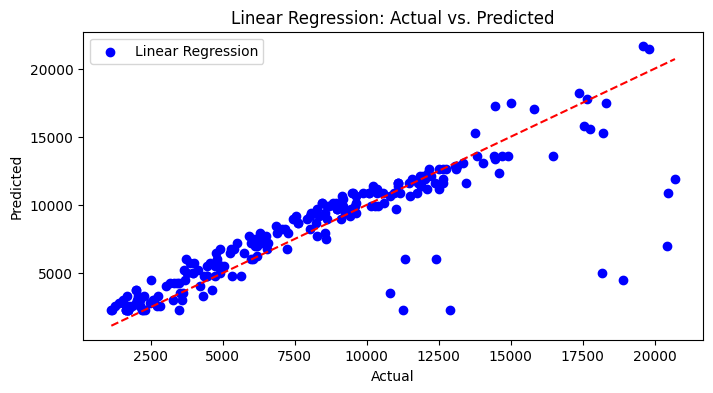

In [ ]:
# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_mae = mean_absolute_error(y_test, dt_predictions)

# Plot actual vs. predicted values for Decision Tree
plt.figure(figsize=(8, 4))
plt.scatter(y_test, dt_predictions, color='green', label='Decision Tree')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Decision Tree: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)

# Plot actual vs. predicted values for Random Forest
plt.figure(figsize=(8, 4))
plt.scatter(y_test, rf_predictions, color='orange', label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Random Forest: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)

# Plot actual vs. predicted values for Gradient Boosting
plt.figure(figsize=(8, 4))
plt.scatter(y_test, gb_predictions, color='purple', label='Gradient Boosting')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Gradient Boosting: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)

# Plot actual vs. predicted values for Linear Regression
plt.figure(figsize=(8, 4))
plt.scatter(y_test, lr_predictions, color='blue', label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [ ]:
# Print the evaluation metrics
print("Decision Tree - MSE: ", dt_mse)
print("Decision Tree - MAE: ", dt_mae)
print("Random Forest - MSE: ", rf_mse)
print("Random Forest - MAE: ", rf_mae)
print("Gradient Boosting - MSE: ", gb_mse)
print("Gradient Boosting - MAE: ", gb_mae)
print("Linear Regression - MSE: ", lr_mse)
print("Linear Regression - MAE: ", lr_mae)

Decision Tree - MSE:  5728632.311218643
Decision Tree - MAE:  1275.0243094744608
Random Forest - MSE:  5717712.711995242
Random Forest - MAE:  1276.4405162777841
Gradient Boosting - MSE:  5620075.226137549
Gradient Boosting - MAE:  1234.973946903902
Linear Regression - MSE:  5958015.664548768
Linear Regression - MAE:  1294.7790805755785


In [ ]:
# Linear Regression
print("Linear Regression:")
# Feature importances
importance = lr_model.coef_

for i, feature in enumerate(X.columns):
    print(f"{feature}: {coefficients[i]}")

print()

# Decision Tree
print("Decision Tree:")
# Feature importances
importance = dt_model.feature_importances_

for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}")

print()

# Random Forest
print("Random Forest:")
# Feature importances
importance = rf_model.feature_importances_

for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}")

print()

# Gradient Boosting
print("Gradient Boosting:")
# Feature importances
importance = gb_model.feature_importances_
for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}")


Linear Regression:
age: 245.45032704888754
smoker_encoded: 13001.551594675733

Decision Tree:
age: 0.6283321204573397
smoker_encoded: 0.3716678795426604

Random Forest:
age: 0.6141597608246241
smoker_encoded: 0.38584023917537597

Gradient Boosting:
age: 0.6199252235871211
smoker_encoded: 0.3800747764128788


##Prediction

In [ ]:
# Example input for prediction
new_data = pd.DataFrame({'age': [30], 'smoker_encoded': [1]})

# Linear Regression
lr_predictions = lr_model.predict(new_data)
print("Linear Regression Predictions:", lr_predictions)

# Decision Tree
dt_predictions = dt_model.predict(new_data)
print("Decision Tree Predictions:", dt_predictions)

# Random Forest
rf_predictions = rf_model.predict(new_data)
print("Random Forest Predictions:", rf_predictions)

# Gradient Boosting
gb_predictions = gb_model.predict(new_data)
print("Gradient Boosting Predictions:", gb_predictions)

Linear Regression Predictions: [18250.99676297]
Decision Tree Predictions: [19323.2621875]
Random Forest Predictions: [19275.1274884]
Gradient Boosting Predictions: [18919.38558574]


In [ ]:
# Example input for prediction
new_data = pd.DataFrame({'age': [35], 'smoker_encoded': [0]}) # Gradient Boosting
gb_predictions = gb_model.predict(new_data)
print("Gradient Boosting Predictions:", gb_predictions)

Gradient Boosting Predictions: [6169.09883742]


In [ ]:
# Example input for prediction
new_data = pd.DataFrame({'age': [35], 'smoker_encoded': [1]}) # Gradient Boosting
gb_predictions = gb_model.predict(new_data)
print("Gradient Boosting Predictions:", gb_predictions)


Gradient Boosting Predictions: [19735.06590245]


In [ ]:
# Example input for prediction
new_data = pd.DataFrame({'age': [67], 'smoker_encoded': [0]}) # Gradient Boosting
gb_predictions = gb_model.predict(new_data)
print("Gradient Boosting Predictions:", gb_predictions)

Gradient Boosting Predictions: [14685.8553561]


In [ ]:
# Example input for prediction
new_data = pd.DataFrame({'age': [67], 'smoker_encoded': [1]}) # Gradient Boosting
gb_predictions = gb_model.predict(new_data)
print("Gradient Boosting Predictions:", gb_predictions)

Gradient Boosting Predictions: [19151.9711604]


#Deep Learning ➡ Artificial Neural Network (ANN)

##Import Libraries

In [72]:
import matplotlib.pyplot as plt
import keras
import numpy as np
import tensorflow as tf

from pandas import read_csv
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras import models, layers, optimizers
from sklearn.metrics import mean_absolute_error

In [ ]:
#load csv file using pandas
data = pd.read_csv("/content/drive/MyDrive/Celerates/insurance.csv")

In [ ]:
# Menampilkan jumlah baris dalam dataset
print("Jumlah baris dalam dataset:", data.shape[0])


Jumlah baris dalam dataset: 1338


##Prepocessing

In [91]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Separate
X = data.drop(columns=["charges"])
y = data["charges"]

In [64]:
# Change categorical to numerik
X = pd.get_dummies(X)

In [92]:
# Separate test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##Modelling

In [102]:
# Inisialisasi model Sequential
model = Sequential()

In [103]:
# Tambahkan layer input
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

In [104]:
# Tambahkan beberapa layer tersembunyi
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))

In [105]:
# Tambahkan layer output
model.add(layers.Dense(1, activation='linear'))  # linear activation untuk regresi

In [106]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [107]:
# Tampilkan ringkasan model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                768       
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 16)                528       
                                                                 
 dense_16 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3393 (13.25 KB)
Trainable params: 3393 (13.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [108]:
# Fitting model
history = model.fit(X_train, y_train, epochs=150, batch_size=50, verbose=1, validation_split=0.2)

Epoch 1/150
18/18 [==============================] - 1s 13ms/step - loss: 325571488.0000 - mae: 13522.1533 - val_loss: 310332800.0000 - val_mae: 12654.2432
Epoch 2/150
18/18 [==============================] - 0s 4ms/step - loss: 325360160.0000 - mae: 13514.7998 - val_loss: 310162528.0000 - val_mae: 12648.1064
Epoch 3/150
18/18 [==============================] - 0s 4ms/step - loss: 325116800.0000 - mae: 13506.4004 - val_loss: 309833440.0000 - val_mae: 12636.1982
Epoch 4/150
18/18 [==============================] - 0s 4ms/step - loss: 324621600.0000 - mae: 13488.6484 - val_loss: 309083008.0000 - val_mae: 12608.8906
Epoch 5/150
18/18 [==============================] - 0s 4ms/step - loss: 323513536.0000 - mae: 13449.4834 - val_loss: 307592672.0000 - val_mae: 12554.2900
Epoch 6/150
18/18 [==============================] - 0s 4ms/step - loss: 321320928.0000 - mae: 13374.3682 - val_loss: 304763328.0000 - val_mae: 12449.8994
Epoch 7/150
18/18 [==============================] - 0s 4ms/step - lo

In [109]:
# Predict
y_pred = model.predict(X_test_scaled)

9/9 [==============================] - 0s 2ms/step


In [110]:
# Counting MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 9774.793038191798


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


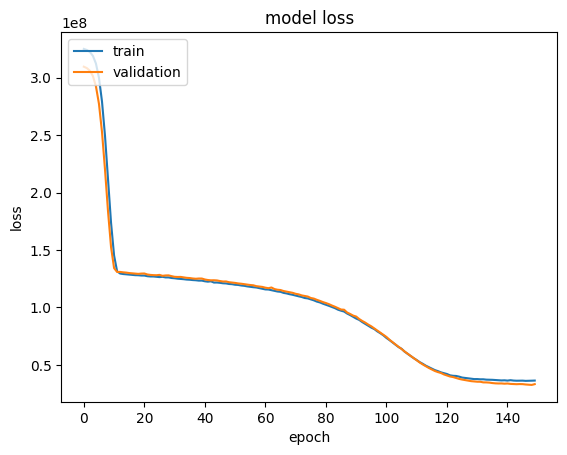

In [100]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

##Prediction

In [111]:
Xnew = np.array([[0.006, 25, 5, 0, 1.5, 6.5, 70, 5, 1, 200, 15.3, 396.9, 5]])

ynew = network.predict(Xnew)
print("X=%s \n Predicted=%s" % (Xnew[0], ynew[0]))

1/1 [==============================] - 0s 20ms/step
X=[6.000e-03 2.500e+01 5.000e+00 0.000e+00 1.500e+00 6.500e+00 7.000e+01
 5.000e+00 1.000e+00 2.000e+02 1.530e+01 3.969e+02 5.000e+00] 
 Predicted=[24.093216]


#Machine Learning vs Deep Learning

Dalam tugas ini, saya telah membangun model menggunakan pendekatan Machine Learning (ML) dan Deep Learning (DL) untuk memprediksi nilai premi asuransi dari fitur-fitur yang diberikan. Berikut adalah ringkasan kesimpulan dari tugas ini:

1. Pendekatan Machine Learning menggunakan algoritma decision tree, random forest, gradient boosting, dan linear regression. Semua algoritma diuji dengan menggunakan MSE dan MAE. Hasilnya menunjukkan bahwa performa terbaik terjadi saat menggunakan MAE, dimana semakin kecil nilai MAE, semakin baik model dalam memprediksi nilai premi asuransi. Oleh karena itu, prediksi dengan MAE yang lebih kecil dianggap lebih baik. Pada kasus ini, model Gradient Boosting menunjukkan performa terbaik dengan MAE sebesar 1234.973946903902.

2. Pendekatan Deep Learning menggunakan algoritma Artificial Neural Network (ANN), yang menghasilkan nilai MAE sebesar 9774.793038191798.

3. Dapat dilihat bahwa nilai MAE dari model Machine Learning lebih rendah daripada nilai MAE dari model Deep Learning, menunjukkan bahwa model Machine Learning lebih akurat dalam memprediksi premi asuransi. Hal ini disebabkan karena kesalahan prediksi yang lebih rendah pada model Machine Learning saat membandingkan prediksi dengan nilai premi sebenarnya.

Dengan demikian, dapat disimpulkan bahwa dalam kasus ini, model Machine Learning dengan menggunakan algoritma Gradient Boosting memberikan hasil yang lebih akurat dalam memprediksi premi asuransi dari data yang diberikan. Meskipun secara teori seharusnya nilai MAE dari model Deep Learning lebih kecil dari nilai MAE model Machine Learning, namun kemungkinan terdapat kesalahan (pribadi) dalam eksekusi model Deep Learning.